#Problem 1
###(A)
$A_x = \{(0, 0),(1, 0),(0, 1),(1, 1)\}$

$W = \begin{bmatrix}1 & 0\\1 & 0\\0 & 1\\0 & 1\end{bmatrix}$

$y=Wx$

$A_y = \{\begin{bmatrix}1 & 0\\1 & 0\\0 & 1\\0 & 1\end{bmatrix}(0, 0),\begin{bmatrix}1 & 0\\1 & 0\\0 & 1\\0 & 1\end{bmatrix}(1, 0),\begin{bmatrix}1 & 0\\1 & 0\\0 & 1\\0 & 1\end{bmatrix}(0, 1),\begin{bmatrix}1 & 0\\1 & 0\\0 & 1\\0 & 1\end{bmatrix}(1, 1)\} = \{(0, 0, 0, 0),(1, 1, 0, 0),(0, 0, 1, 1),(1, 1, 1, 1)\}$
###(B)
$P(Y = y) = \frac{1}{4}$
###(C)
$H[P(X)]=-\sum\limits_{x\in A_x}P(x)log_2(P(x))=-(\frac{1}{4}log_2(\frac{1}{4})+\frac{1}{4}log_2(\frac{1}{4})+\frac{1}{4}log_2(\frac{1}{4})+\frac{1}{4}log_2(\frac{1}{4}))=-log_2(\frac{1}{4})=2 \textrm{ bits.}$

$H[P(Y)]=-\sum\limits_{y\in A_y}P(y)log_2(P(y))=-(\frac{1}{4}log_2(\frac{1}{4})+\frac{1}{4}log_2(\frac{1}{4})+\frac{1}{4}log_2(\frac{1}{4})+\frac{1}{4}log_2(\frac{1}{4}))=-log_2(\frac{1}{4})=2 \textrm{ bits.}$
###(D)
$H[P(Z)]=-\sum\limits_{z\in A_z}P(z)log_2(P(z))=-2^4(\frac{1}{2^4}log_2(\frac{1}{2^4}))=-log_2(\frac{1}{2^4})=4 \textrm{ bits.}$
###(E)
$P(y_1=0)=P(y_1=1)=0.5, P(y_2=0)=P(y_2=1)=0.5$

$P(0,0)=0.5, P(0,1)=0, P(1,0)=0, P(1,1)=0.5$

$I[y_1, y_2] = 0.5*log_2\frac{0.5}{0.25} + 0*log_2\frac{0}{0.25} + 0*log_2\frac{0}{0.25} + 0.5*log_2\frac{0.5}{0.25} = log_2(2) = 1\textrm{ bit}$
#Problem 2
###(A)
Inner product $\langle\mu_g,\mu_s\rangle=0$; this is relavent to PCA because these mean vectors are orthonormal and we will generate data that is orthonormal, and it will cause the eigenvectors to mirror the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [2]:
def generate(mu1,mu2,datapoints):
  g = np.random.poisson(lam=(mu1), size=(datapoints, len(mu1)))
  s = np.random.poisson(lam=(mu2), size=(datapoints, len(mu2)))
  return (g,s)

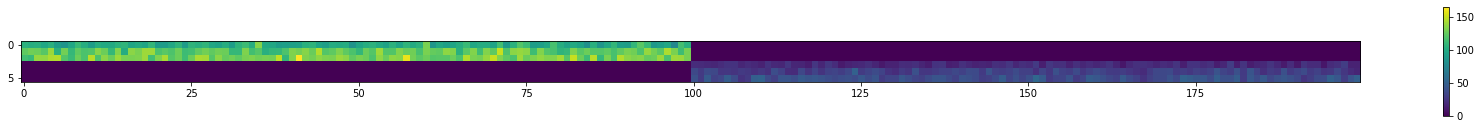

In [3]:
datapoints = 100
growstarve = generate([100, 125, 130, 0, 0, 0],[0, 0, 0, 20, 30, 40],datapoints)
data = np.concatenate((growstarve[0], growstarve[1]), axis=0).T
plt.figure(figsize=(30,2)) 
plt.imshow(data)
plt.colorbar()
plt.show()

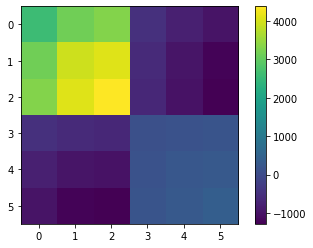

In [4]:
meancentered = np.array([x-np.mean(x) for x in data])
covariance = 1/(2*datapoints)*np.matmul(meancentered,meancentered.T)
# plt.figure(figsize=(10,10))
plt.imshow(covariance)
plt.colorbar()
plt.show()

[1.153031e+04 4.925000e+01 4.158000e+01 9.590000e+00 2.412000e+01
 1.828000e+01]
[[ 0.47  0.37  0.79 -0.08  0.13 -0.06]
 [ 0.58  0.51 -0.62 -0.07  0.1  -0.05]
 [ 0.61 -0.78 -0.03 -0.07  0.1  -0.05]
 [-0.09 -0.   -0.01 -0.98 -0.12  0.16]
 [-0.14 -0.01 -0.02 -0.16  0.13 -0.97]
 [-0.18 -0.02 -0.03 -0.07  0.97  0.17]]


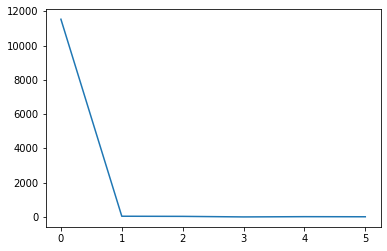

In [5]:
l,v = LA.eig(covariance)
print(np.round(l,2))
print(np.round(v,2))
plt.plot(l)

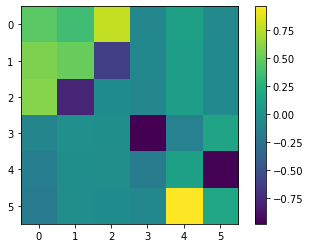

In [6]:
plt.imshow(v)
plt.colorbar()
plt.show()

The eigenvector entries do seem to mirror the structure of the gene expression programs; it is similar to the covariance matrix with two corners being right around 0 and the other corners having signal (first three genes or last three genes being near 0).

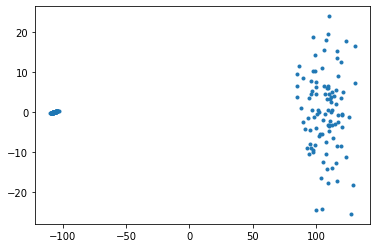

In [7]:
plt.plot(np.matmul(meancentered.T,v.T[0]),np.matmul(meancentered.T,v.T[1]),'.')

#Problem 3
###(A)
Inner product $\langle\mu_g,\mu_s\rangle=800+1500+2500=4800$; this is relavent to PCA because these vectors are not orthonormal, and the data generated will have overlap in genes, so the eigenvectors won't mirror the data.

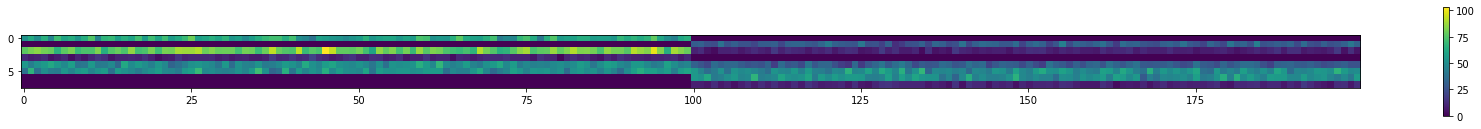

In [8]:
datapoints = 100
growstarve = generate([60, 0, 80, 10, 50, 50, 0, 0],[0, 30, 10, 0, 30, 50, 50, 10],datapoints)
data = np.concatenate((growstarve[0], growstarve[1]), axis=0).T
plt.figure(figsize=(30,2)) 
plt.imshow(data)
plt.colorbar()
plt.show()

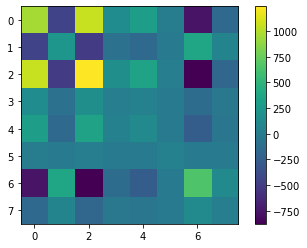

In [9]:
meancentered = np.array([x-np.mean(x) for x in data])
covariance = 1/(2*datapoints)*np.matmul(meancentered,meancentered.T)
# plt.figure(figsize=(10,10))
plt.imshow(covariance)
plt.colorbar()
plt.show()

[3169.26   57.13   38.89    4.4     5.06   30.46   17.29   24.8 ]
[[ 0.54  0.07  0.25 -0.04  0.02  0.79  0.07  0.  ]
 [-0.26 -0.06  0.2  -0.   -0.07  0.04  0.94 -0.07]
 [ 0.62 -0.17  0.15  0.02  0.09 -0.47  0.12 -0.56]
 [ 0.09  0.03 -0.02 -0.71 -0.69 -0.08 -0.02 -0.  ]
 [ 0.18  0.13 -0.92  0.02  0.01  0.14  0.23 -0.16]
 [ 0.01 -0.97 -0.14 -0.02 -0.04  0.12 -0.02  0.16]
 [-0.45 -0.09  0.03 -0.01 -0.08  0.33 -0.22 -0.79]
 [-0.09 -0.02 -0.02 -0.7   0.71  0.01  0.03 -0.02]]


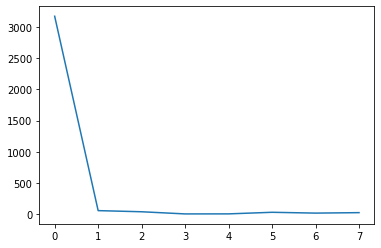

In [10]:
l,v = LA.eig(covariance)
print(np.round(l,2))
print(np.round(v,2))
plt.plot(l)

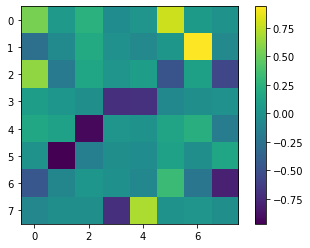

In [11]:
plt.imshow(v)
plt.colorbar()
plt.show()

The eigenvector entries don't seem to mirror the structure of the gene expression programs.

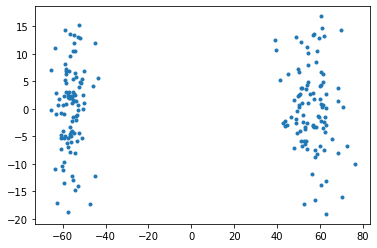

In [12]:
plt.plot(np.matmul(meancentered.T,v.T[0]),np.matmul(meancentered.T,v.T[1]),'.')

#Problem 4

In [13]:
!wget https://www.dropbox.com/s/p7q3n65rcrzqy4v/pbmc_data_final_log.csv?dl=0 -O pbmc_data_final_log.csv
data = np.genfromtxt('pbmc_data_final_log.csv', delimiter=',')

--2021-12-09 05:34:23--  https://www.dropbox.com/s/p7q3n65rcrzqy4v/pbmc_data_final_log.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/p7q3n65rcrzqy4v/pbmc_data_final_log.csv [following]
--2021-12-09 05:34:23--  https://www.dropbox.com/s/raw/p7q3n65rcrzqy4v/pbmc_data_final_log.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69863230f7c33347c4d4778869.dl.dropboxusercontent.com/cd/0/inline/Bbd9bcvyD1IA_jp8NDoBNkvMQsFJ7ccNshcxrPV4SjW5gEGiKpoYJhob4Afid9vbNqifn2la-h9T2hSkPjmMZeyPpb_gjLUrtGKUZbmaubXTKP8yoQsgYrjooPwwUGws7AadNqvXO3cYLkniyOuLLdh8/file# [following]
--2021-12-09 05:34:23--  https://uc69863230f7c33347c4d4778869.dl.dropboxusercontent.com/cd/0/inline/Bbd9bcvyD1IA_jp8NDoBNkvMQsFJ7ccNshcxrPV4SjW5gEGiKpoY

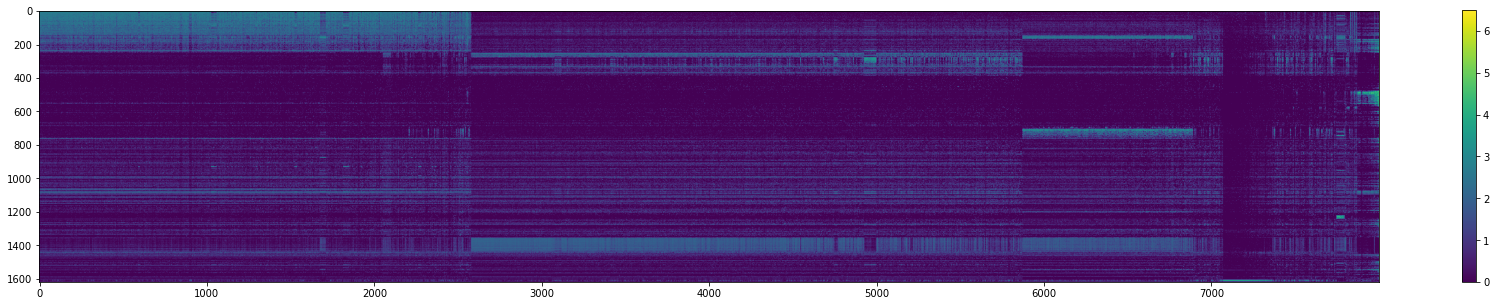

In [30]:
plt.figure(figsize=(30,5)) 
plt.imshow(data)
plt.colorbar()
plt.show()

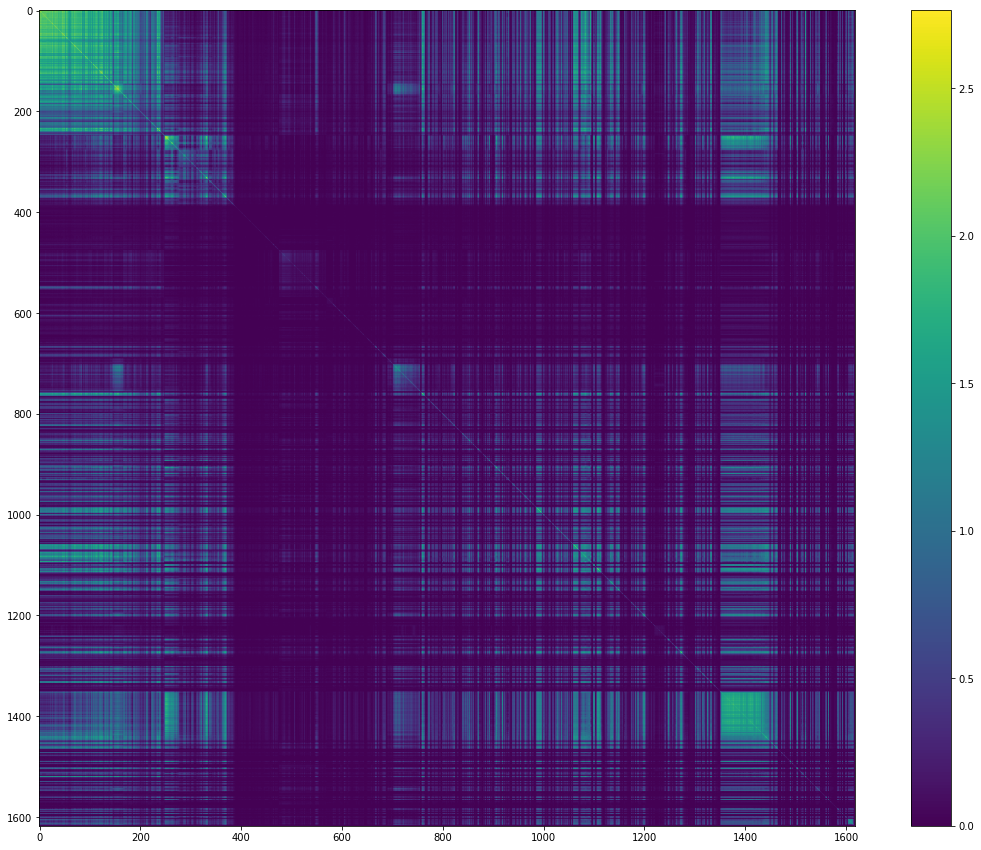

In [31]:
covariance = 1/(data.shape[1])*np.matmul(data,data.T)
plt.figure(figsize=(20,15))
plt.imshow(covariance)
plt.colorbar()
plt.show()

In [32]:
meancentered = np.array([row-np.mean(row) for row in data])
covariance = 1/(data.shape[1])*np.matmul(meancentered,meancentered.T)
l,v = LA.eig(covariance)

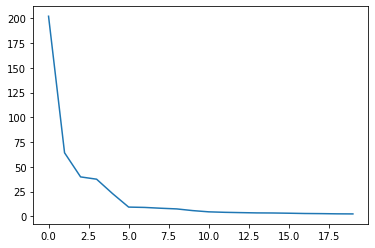

In [33]:
plt.plot(l[:20])

The eigenvalues decay fairly quickly with an especially large jump from the first to second eigenvalues.

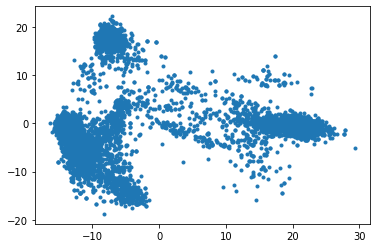

In [34]:
plt.plot(np.matmul(meancentered.T,v.T[0]),np.matmul(meancentered.T,v.T[1]),'.')

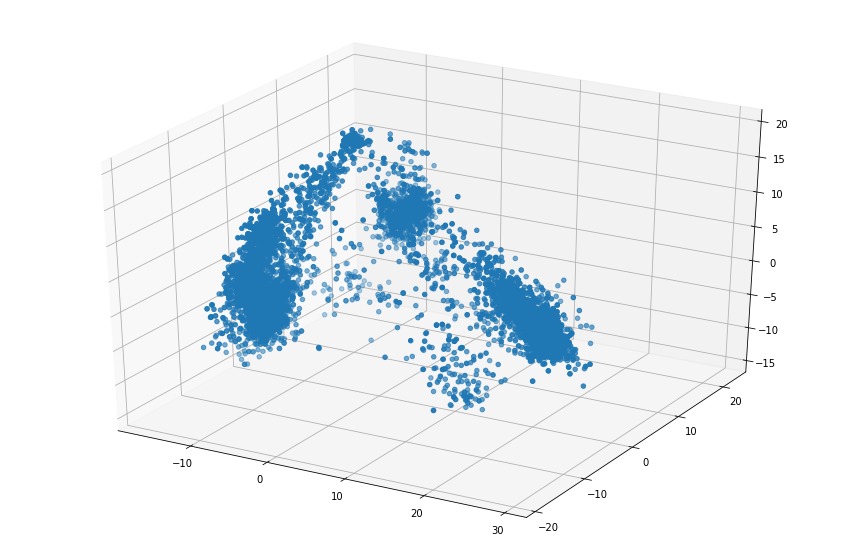

In [36]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection ="3d")
ax.scatter3D(np.matmul(meancentered.T,v.T[0]),np.matmul(meancentered.T,v.T[1]),np.matmul(meancentered.T,v.T[2]))

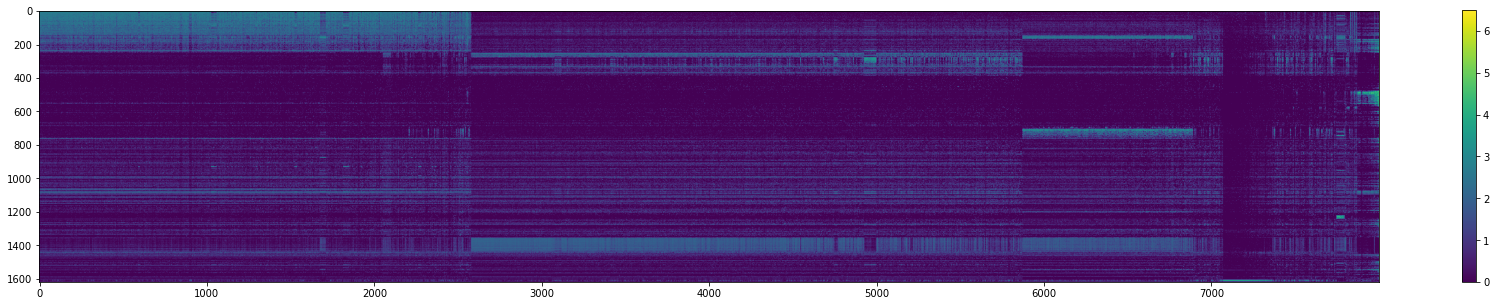

In [20]:
plt.figure(figsize=(30,5)) 
plt.imshow(data)
plt.colorbar()
plt.show()

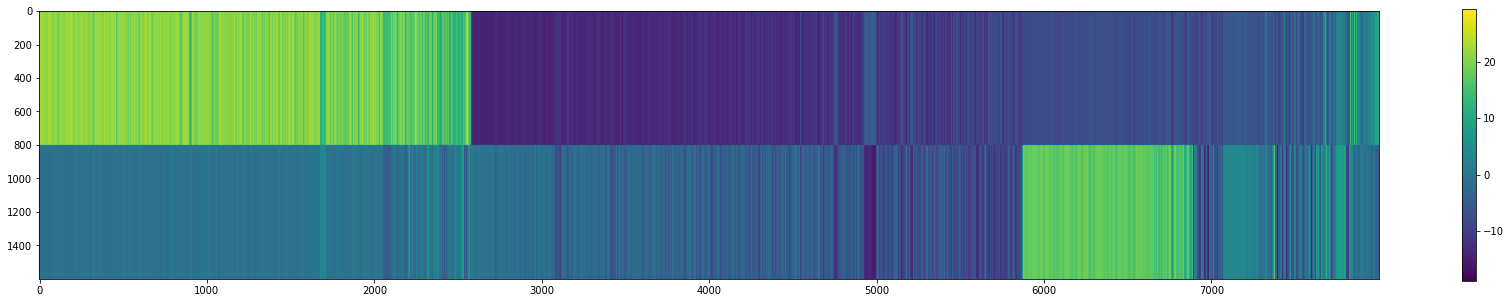

In [21]:
plt.figure(figsize=(30,5)) 
plt.imshow(np.concatenate((np.array(800*[np.matmul(meancentered.T,v.T[0])]),np.array(800*[np.matmul(meancentered.T,v.T[1])]))))
plt.colorbar()
plt.show()

The principal componenets do seem to capture the blocks in the data (extra copies of each of the first two eigenvectors were added for visualization).

[0.15541287 0.04934741 0.03062078 0.02883791 0.01760131 0.00717251
 0.00691135 0.00628081 0.00576009 0.0044408 ]


0.31238584063194597

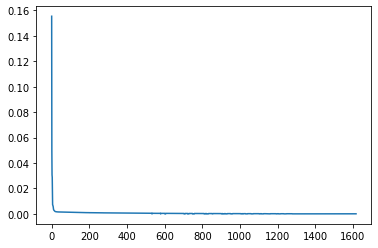

In [22]:
eigensum = sum(l)
fracVar = l/eigensum
plt.plot(fracVar)
print(fracVar[:10])
sum(fracVar[:10])

Around 31% fractional variance is captured by the first 10 eigenvectors.
#Problem 5
###(A)
This network has three fully connected neurons where most of the activity stays at the same neurons and some goes between neurons.
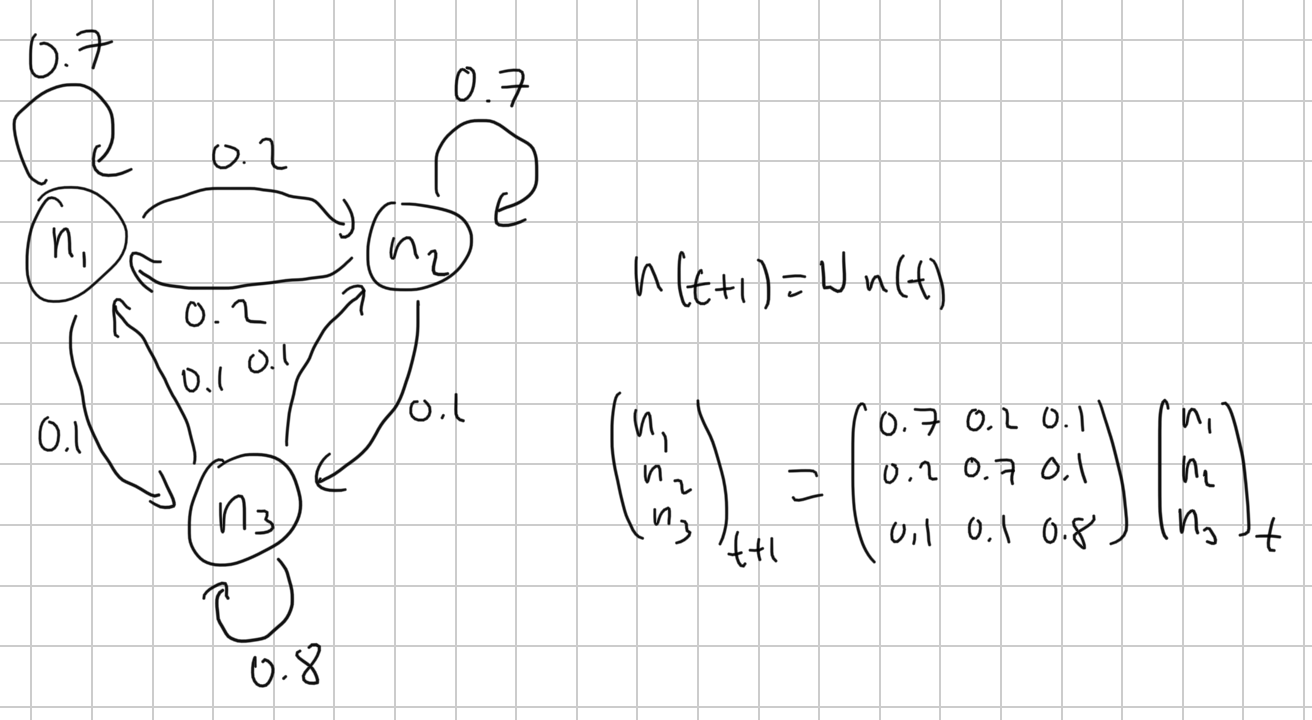
###(B)

In [23]:
W=[[0.7,0.2,0.1],[0.2,0.7,0.1],[0.1,0.1,0.8]]
l,v = LA.eig(W)
print(np.round(l,2))
print(np.round(v,2))

[1.  0.5 0.7]
[[-0.58 -0.71 -0.41]
 [-0.58  0.71 -0.41]
 [-0.58  0.    0.82]]


###(C)
Since we have $W\textbf{v}=\lambda \textbf{v}$ with eigenvector $v_i = \begin{bmatrix}-0.58\\-0.58\\-0.58\end{bmatrix}$ and eigenvalue $\lambda_i=1$, we have $W^kv_i=\lambda_i^kv_i=1^k\begin{bmatrix}-0.58\\-0.58\\-0.58\end{bmatrix}=\begin{bmatrix}-0.58\\-0.58\\-0.58\end{bmatrix}$
###(D)

In [28]:
np.matmul(np.linalg.matrix_power(W, 50),[1,0,0])

array([0.33333334, 0.33333334, 0.33333333])

This is equivalent to our first eigenvector, so further multiplication by $W$ will keep the vector the same. This shows that this starting state will reach a steady state because we reach an eigenvector and have an eigenvalue of 1.